# a) count nodes and edges

In [ ]:
# Initialize an empty dictionary for the graph and a counter for edges
graph = {}
edges = 0


with open('graph1.txt', 'r') as f:
   for line in f:

    #read node1 , node2 from file
       node1, node2 = map(int, line.strip().split())

       # Add node1 to the graph if it's not already there
       if node1 not in graph:
           graph[node1] = set()

       # Add node2 to the graph if it's not already there
       if node2 not in graph:
           graph[node2] = set()

       # Add node2 to the neighbors of node1
       graph[node1].add(node2)


# Print the number of nodes and edges
print(f'Number of nodes: {len(graph)}')
print(f'Number of edges: {sum(len(neighbors) for neighbors in graph.values())}')


Number of nodes: 3718
Number of edges: 91723


b) make graph based on erdos reniy model


In [ ]:
import random

# Calculate the probability
N = len(graph)
#p = 2 * edges / (N * (N - 1))
p = 0.00668
random.seed(42)

# Generate a graph based on the Erdos-Renyi model
erdos_graph = {node: set() for node in graph.keys()}
for node1 in erdos_graph.keys():
   for node2 in erdos_graph.keys():
       if node1 != node2 and random.random() < p:
           erdos_graph[node1].add(node2)


# Write the graph to a file
distinct_nodes=set()
with open('erdos_renyi_graph.txt', 'w') as f:
   for node, neighbors in erdos_graph.items():
       for neighbor in neighbors:
           f.write(f'{node} {neighbor}\n')



In [ ]:
print(f'Number of nodes in Erdos raniy: {len(erdos_graph)}')
print(f'Number of edges(undirected) in Erdos raniy: {sum(len(neighbors) for neighbors in erdos_graph.values()) }')


Number of nodes in Erdos raniy: 3718
Number of edges(undirected) in Erdos raniy: 91653


# c) make graph based on small word moodel(watts strogatz)

In [ ]:

k = 13 #number of nearest neighbors connect in ring
graph_nodes = []
graph_nodes = list(graph.keys())
graph_nodes.sort()


smallworld_graph = {node: set() for node in graph_nodes}

# make a ring lattice

for i , node in enumerate(graph_nodes):
  for j in range (1,k) :
    neighbor1 = graph_nodes[(i+j) % N]
    neighbor2 = graph_nodes[(i-j) % N]

    smallworld_graph[node].add(neighbor1)
    smallworld_graph[node].add(neighbor2)



# Rewire the edges with probability 0.2
p = 0.2
for node in smallworld_graph:
   edges = list(smallworld_graph[node])
   for edge in edges:
       if random.random() < p:
           # Remove the edge from the graph
           smallworld_graph[node].remove(edge)
           # Find a new node to connect to
           new_node = random.choice(list(smallworld_graph.keys()))
           while new_node == node or new_node in smallworld_graph[node]:
             new_node = random.choice(list(smallworld_graph.keys()))
           # Add the new edge to the graph
           smallworld_graph[node].add(new_node)

# Write the graph to a file
distinct_nodes = set()

with open('smallworld_graph.txt', 'w') as f:
   for node, neighbors in smallworld_graph.items():
       for neighbor in neighbors:
           f.write(f'{node} {neighbor}\n')





In [ ]:
print(f'Number of nodes in small word: {len(smallworld_graph)}')
print(f'Number of edges in small word: {sum(len(neighbors) for neighbors in smallworld_graph.values()) }')

Number of nodes in small word: 3718
Number of edges in small word: 89232


# d)plot log-log for degree distribution of all graphs

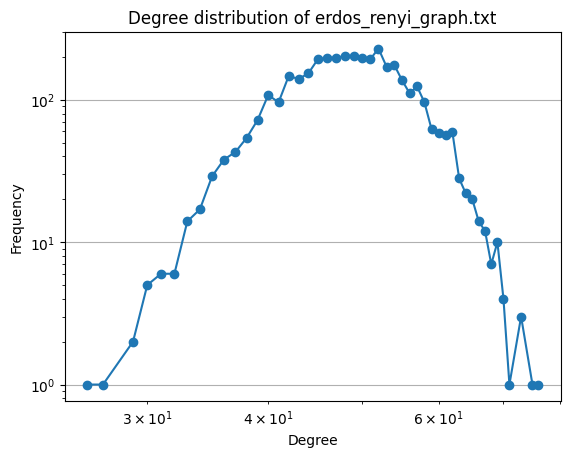

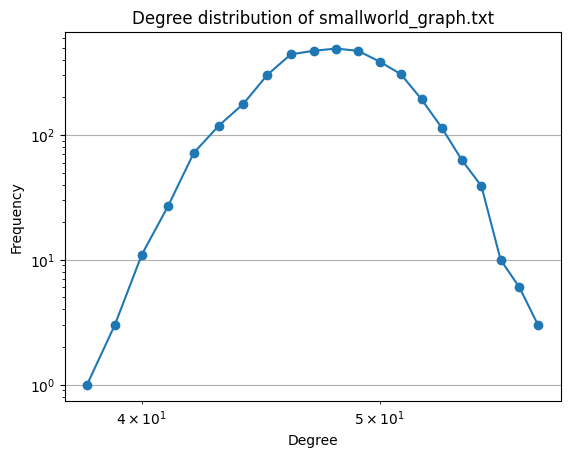

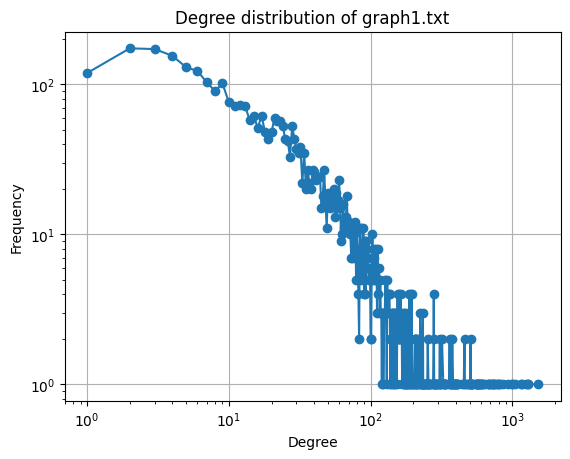

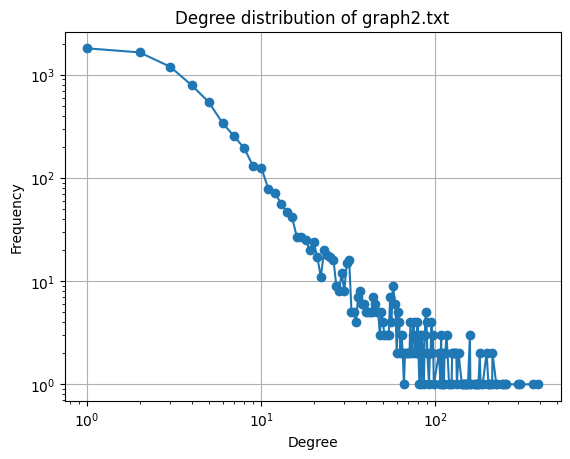

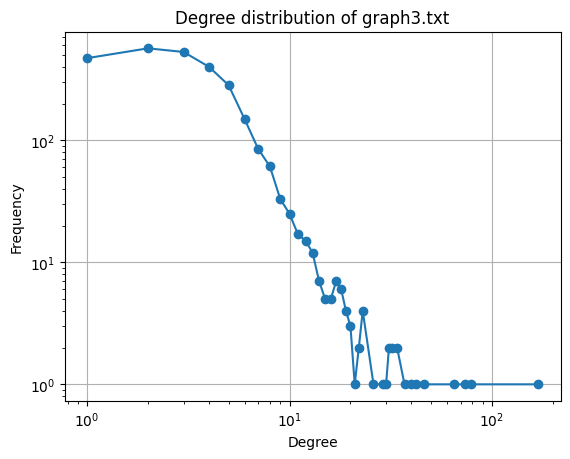

In [ ]:
import matplotlib.pyplot as plt

filenames = ['erdos_renyi_graph.txt', 'smallworld_graph.txt', 'graph1.txt' , 'graph2.txt' , 'graph3.txt']


def calculate_degree_distribution(filename):
  degree_dict = {}

  with open(filename, 'r') as f:
      for line in f:

          node1, node2 = map(int, line.strip().split())
          degree_dict[node1] = degree_dict.get(node1, 0) + 1
          degree_dict[node2] = degree_dict.get(node2, 0) + 1

  # Count the frequency of each degree
  degree_distribution = {}
  for degree in degree_dict.values():
      if degree in degree_distribution:
          degree_distribution[degree] += 1
      else:
          degree_distribution[degree] = 1

  return degree_distribution

# Calculate degree distribution for each file
degree_distributions = []
for filename in filenames:
  degree_distribution = calculate_degree_distribution(filename)
  degree_distributions.append(degree_distribution)

# Plot degree distribution in log-log scale
for i, degree_distribution in enumerate(degree_distributions):
   plt.figure(i)
   plt.loglog(*zip(*sorted(degree_distribution.items())), marker='o')
   plt.title(f'Degree distribution of {filenames[i]}')
   plt.xlabel('Degree')
   plt.ylabel('Frequency')
   plt.grid(True)
   plt.show()


# e)calculate average path lenghts , graph diameter(directed)

In [ ]:
def read_graph_from_file_undirected(filename):
  graph = {}
  with open(filename, 'r') as f:
      for line in f:
          node1, node2 = map(int, line.strip().split())
          if node1 not in graph:
              graph[node1] = set()
          if node2 not in graph:
              graph[node2] = set()
          graph[node1].add(node2)
          graph[node2].add(node1)


  return graph


In [ ]:
def read_graph_from_file_directed(filename):
  graph = {}
  with open(filename, 'r') as f:
      for line in f:
          node1, node2 = map(int, line.strip().split())
          if node1 not in graph:
              graph[node1] = set()
          if node2 not in graph:
              graph[node2] = set()
          graph[node1].add(node2)



  return graph


In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set([start])
    queue = deque([(start, 0)])  # store node with its level (distance from start)

    distances = []

    while queue:
        vertex, level = queue.popleft()
        distances.append(level)

        for neighbour in graph[vertex]:
            if neighbour not in visited:
                queue.append((neighbour, level + 1))
                visited.add(neighbour)

    return distances

from tqdm import tqdm

def average_path_length(graph):
   all_distances = []
   for node in tqdm(graph):
       all_distances.extend(bfs(graph, node))
   #print(all_distances)
   return sum(all_distances) / len(all_distances)



def graph_diameter(graph):
   max_distance = 0
   for node in tqdm(graph):
       distances = bfs(graph, node)
       max_distance = max(max_distance, max(distances))

   return max_distance


# e)calculate average path lenghts , graph diameter(undirected)

In [ ]:
orginal_graph1_undirected = read_graph_from_file_undirected('graph1.txt')
orginal_graph2_undirected = read_graph_from_file_undirected('graph2.txt')
orginal_graph3_undirected = read_graph_from_file_undirected('graph3.txt')

In [ ]:
print(f'average_path_length of graph1: {average_path_length(orginal_graph1_undirected)} \n')
print(f'\n graph diameter of graph1: {graph_diameter(orginal_graph1_undirected)} \n ')


100%|██████████| 3718/3718 [01:36<00:00, 38.72it/s]


average_path_length of graph1: 2.6614569483150605 



100%|██████████| 3718/3718 [01:34<00:00, 39.21it/s]


 graph diameter of graph1: 6 
 


In [ ]:
print(f'average_path_length of graph2: {average_path_length(orginal_graph2_undirected)} \n')
print(f'\n graph diameter of graph2: {graph_diameter(orginal_graph2_undirected)} \n ')


100%|██████████| 7886/7886 [01:36<00:00, 82.13it/s] 


average_path_length of graph2: 3.9925345956702696 



100%|██████████| 7886/7886 [01:33<00:00, 84.56it/s]


 graph diameter of graph2: 8 
 


In [ ]:
print(f'average_path_length of graph3: {average_path_length(orginal_graph3_undirected)} \n')
print(f'\n graph diameter of graph3: {graph_diameter(orginal_graph3_undirected)} \n')

100%|██████████| 2708/2708 [00:06<00:00, 441.04it/s]


average_path_length of graph3: 6.307544154141863 



100%|██████████| 2708/2708 [00:05<00:00, 506.29it/s]


 graph diameter of graph3: 19 



In [ ]:
orginal_graph1_directed = read_graph_from_file_directed('graph1.txt')
orginal_graph2_directed = read_graph_from_file_directed('graph2.txt')
orginal_graph3_directed = read_graph_from_file_directed('graph3.txt')

In [ ]:
print(f'average_path_length of graph1: {average_path_length(orginal_graph1_directed)} \n')
print(f'\n graph diameter of graph1: {graph_diameter(orginal_graph1_directed)}')


100%|██████████| 3718/3718 [00:00<00:00, 73152.12it/s]


average_path_length of graph1: 0.9610439957670184 



100%|██████████| 3718/3718 [00:00<00:00, 64958.08it/s]


 graph diameter of graph1: 1


In [ ]:

print(f'average_path_length of graph2: {average_path_length(orginal_graph2_directed)} \n')
print(f'\n graph diameter of graph2: {graph_diameter(orginal_graph2_directed)}')



100%|██████████| 7886/7886 [00:00<00:00, 273826.14it/s]


average_path_length of graph2: 0.7848470793659454 



100%|██████████| 7886/7886 [00:00<00:00, 256602.21it/s]


 graph diameter of graph2: 1


In [ ]:
print(f'average_path_length of graph3: {average_path_length(orginal_graph3_directed)} \n')
print(f'\n graph diameter of graph3: {graph_diameter(orginal_graph3_directed)}')

100%|██████████| 2708/2708 [00:00<00:00, 79100.89it/s]


average_path_length of graph3: 4.533044485264755 



100%|██████████| 2708/2708 [00:00<00:00, 84832.14it/s]


 graph diameter of graph3: 15


# f)clustering coefficient

In [ ]:
erdos_graph_undirected = read_graph_from_file_undirected('erdos_renyi_graph.txt')

smallword_graph_undirected = read_graph_from_file_undirected('smallworld_graph.txt')

In [ ]:
from itertools import combinations

def triangles(graph, node):
   neighbors = set(graph[node])
   count = 0
   for v, w in combinations(neighbors, 2):
       if w in graph[v]:
           count += 1
   return count

def clustering_for_each_node(graph, node):
    t = triangles(graph, node)
    k = len(graph[node])
    return 2*t / (k*(k-1)) if k > 1 else 0

def average_clustering(graph):
    return sum(clustering_for_each_node(graph, node) for node in graph) / len(graph)

In [ ]:
print(f'clustering_coefficient of graph1: {average_clustering(orginal_graph1_undirected)}')
print(f'clustering_coefficient of graph2: {average_clustering(orginal_graph2_undirected)}')
print(f'clustering_coefficient of graph3: {average_clustering(orginal_graph3_undirected)}')
print(f'clustering_coefficient of erdos reniy: {average_clustering(erdos_graph_undirected)}')
print(f'clustering_coefficient of smallword : {average_clustering(smallword_graph_undirected)}')


clustering_coefficient of graph1: 0.0
clustering_coefficient of graph2: 0.0
clustering_coefficient of graph3: 0.2406732985019372
clustering_coefficient of erdos reniy: 0.013212831672455148
clustering_coefficient of smallword : 0.3484374547045638
